In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_csv(r"C:\AI SUPPLY\NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [12]:
data.shape


(34, 3)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [14]:
data.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [15]:
data.sample(10)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
8,Des Moines Register,206.204,344.522
33,Washington Post,838.902,1165.567
21,Orange County Register,354.843,407.760
27,Rocky Mountain News,374.009,432.502
29,San Francisco Chronicle,570.364,704.322
28,Sacramento Bee,273.844,338.355
20,Omaha World Herald,223.748,284.611
14,Miami Herald,444.581,553.479
11,Kansas City Star,288.571,423.305


In [16]:
data.head(10)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [17]:
data.drop('Newspaper',axis=1).corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


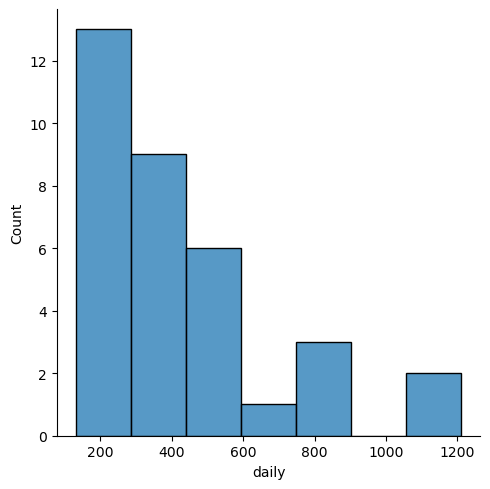

In [18]:
sns.displot(data['daily'])

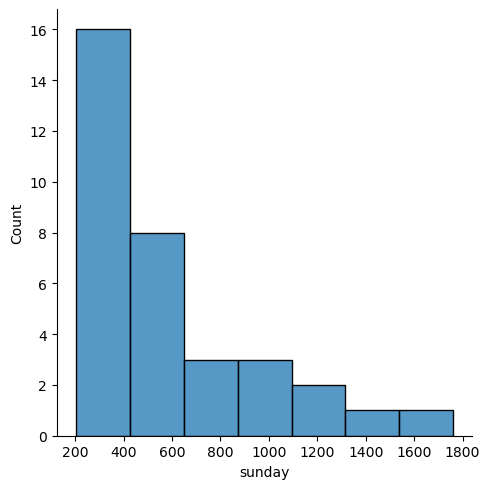

In [19]:
sns.displot(data['sunday'])


In [20]:
import statsmodels.formula.api as smf
model= smf.ols("sunday~daily",data=data).fit()

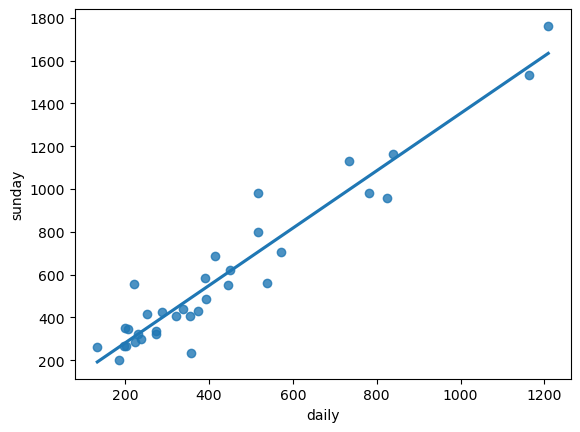

In [21]:
sns.regplot(x="daily",y="sunday",data=data,ci=None);

In [22]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [23]:
print(model.tvalues,'\n',model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [26]:
(model.rsquared,model.rsquared_adj)

(0.9180596895873294, 0.9154990548869335)

In [29]:
newdata=pd.Series([200,300])

In [30]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [31]:
model.predict(data_pred)


0    281.778581
1    415.750057
dtype: float64